![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [45]:
# Import necessary libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [46]:
# Load the datasets
# Assuming 'women_soccer.csv' and 'men_soccer.csv' are the datasets containing the goals scored in women's and men's international soccer matches respectively
women_soccer = pd.read_csv('women_results.csv')
men_soccer = pd.read_csv('men_results.csv')
women_soccer.head()


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [47]:
# Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01
women_world_cup = women_soccer[(women_soccer['tournament'] == 'FIFA World Cup') & (pd.to_datetime(women_soccer['date']) > '2002-01-01')]
men_world_cup = men_soccer[(men_soccer['tournament'] == 'FIFA World Cup') & (pd.to_datetime(men_soccer['date']) > '2002-01-01')]

# Display the first few rows of the filtered dataframes
women_world_cup.head(), men_world_cup.head()

(      Unnamed: 0        date  ... away_score      tournament
 1600        1600  2003-09-20  ...          3  FIFA World Cup
 1601        1601  2003-09-20  ...          0  FIFA World Cup
 1602        1602  2003-09-20  ...          1  FIFA World Cup
 1603        1603  2003-09-20  ...          0  FIFA World Cup
 1604        1604  2003-09-21  ...          1  FIFA World Cup
 
 [5 rows x 7 columns],
        Unnamed: 0        date  ... away_score      tournament
 25164       25164  2002-05-31  ...          1  FIFA World Cup
 25165       25165  2002-06-01  ...          0  FIFA World Cup
 25166       25166  2002-06-01  ...          1  FIFA World Cup
 25167       25167  2002-06-01  ...          2  FIFA World Cup
 25168       25168  2002-06-02  ...          0  FIFA World Cup
 
 [5 rows x 7 columns])

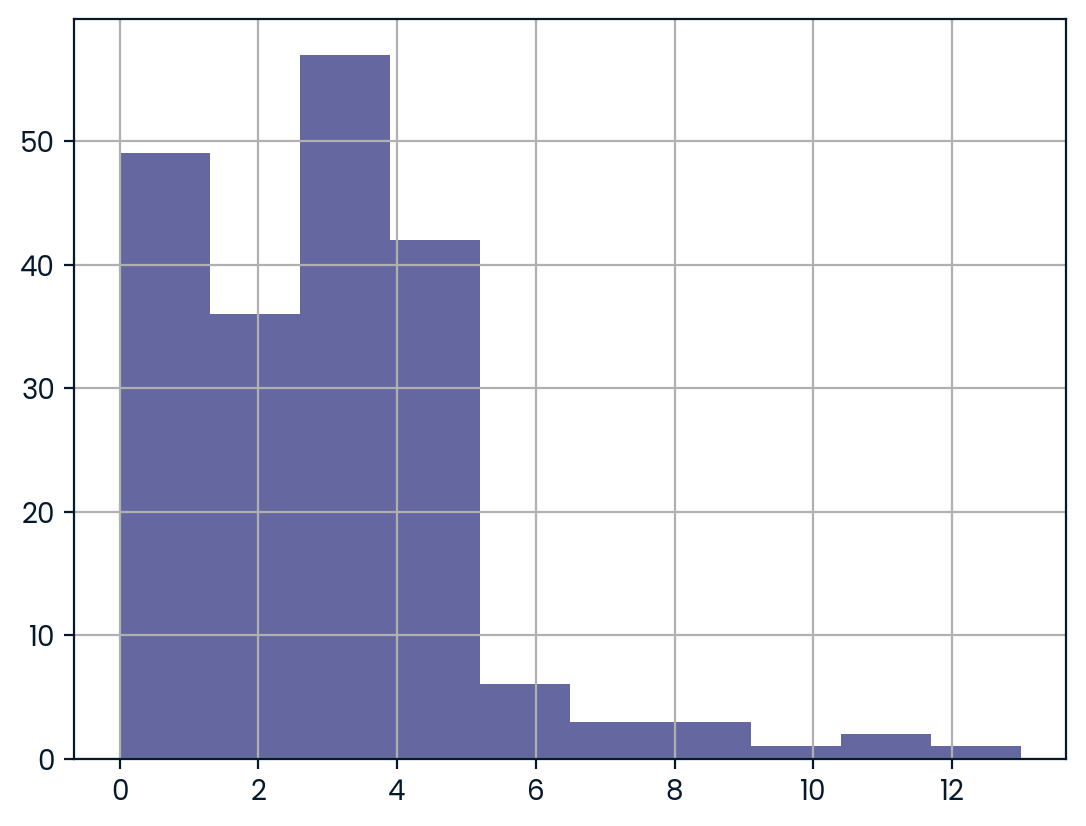

In [48]:
# Check for normal distribution of goals scored in women's and men's World Cup matches

# Extract the goals scored columns
women_world_cup['group'] = 'women'
men_world_cup['group'] = 'men'
women_world_cup['goals'] = women_world_cup['home_score'] + women_world_cup['away_score']
men_world_cup['goals'] = men_world_cup['home_score'] + men_world_cup['away_score']

# Women's World Cup goals histogram
women_world_cup['goals'].hist()
plt.show()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups

In [49]:
# Merge the datasets on the date column
concat_df =pd.concat([women_world_cup, men_world_cup], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
concat_df_sub = concat_df[["goals", "group"]]
both_subset_wide = concat_df_sub.pivot(columns="group", values="goals")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pg.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Extract p-value and result
p_value = results_pg['p-val'].values[0]
result = 'reject' if p_value < 0.1 else 'Fail to Reject Null Hypothesis'

# Store the results in a dictionary
result_dict = {"p_val": p_value, "result": result}

# Output the results
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}